In [1]:
4


4

In [2]:
5

5

In [3]:
'신도형'

'신도형'

In [4]:
4+5

9

In [5]:
5*6


30

In [6]:
a = '비정형 분석 좋아'

In [7]:
a

'비정형 분석 좋아'

In [8]:
b = ['a', 'b', 'c']

In [9]:
b

['a', 'b', 'c']

In [10]:
c = {'a':4, 'b':6} # {'a'=4, 'b'=6}, 즉 =대신 :사용해야 오류안남

In [11]:
c

{'a': 4, 'b': 6}

In [12]:
len(b)

3

* 스플릿 같이 값에 종속되어 있는 형태를 메소드

In [13]:
a.split()

['비정형', '분석', '좋아']

In [14]:
import math # import 라이브러리 호출

In [15]:
import math as m # 변수를 써서 치환해서 쓸 수도 있다.

* 라이브러리 안에 특별 함수만 써서 호출 가능

In [16]:
from math import cos # 코사인을 불러서 쓸 때 이런 형태로 불러서 쓸 수 있음

In [17]:
cos(0)

1.0

In [18]:
from math import * # 특정 라이브러리 전체를 불러올 때는 아스카(*)를 쓰면 된다

# 빈도 분석을 통한 wordcloud 그리기

In [19]:
!pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl

Processing c:\users\sawoo\jupyter notebook file\wordcloud-1.8.1-cp39-cp39-win_amd64.whl
wordcloud is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [20]:
!pip install requests

In [21]:
import requests

In [22]:
url = 'http://www.gutenberg.org/files/2591/2591-0.txt'

In [23]:
res = requests.get(url)

In [24]:
res.status_code

200

In [25]:
res.text[:100] # 결과에 텍스트라는 메소드에 실제 값을 가지고 온다

'ï»¿The Project Gutenberg eBook of Grimmsâ\x80\x99 Fairy Tales, by Jacob Grimm and Wilhelm Grimm\r\n\r\nThis eB'

* words 변수 지정, `r'[a-zA-z]+'` 뜻은 소문자, 대문자 a~z까지 가져오라는 뜻

In [26]:
import re

words = re.findall(r'[a-zA-z]+', res.text)

In [27]:
words[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Grimms',
 'Fairy',
 'Tales',
 'by',
 'Jacob']

* word count로 wordcloud를 그릴 수 가 있다.

In [28]:
word_count = {} # words_count 라는 빈 사전을 만든다

for word in words: # 위에 만든 words만큼 반복을 해서 사전을 만든다
    word = word.lower() # 전부 소문자로 만든다
    if word in word_count: # 기존에 나왔던 단어면
        word_count[word] += 1 # word count에 1 더하기를 해라
    else: # 그렇지 않으면
        word_count[word] = 1 # 1로 해라

In [29]:
word_count['ring'] # ring이라는 단어가 몇 번이나 반복했는지

37

* wordcount는 단어 빈도가 높을수록 글이나 형태를 크고 진하게 해주는 시각화기 때문에 정렬을 해줘야 한다.
* pandas에서 데이터 프레임으로 바꾸고, sort value를 이용해서 정렬을 한다

In [30]:
import pandas as pd

In [31]:
df = pd.DataFrame(list(word_count.items()), columns=['word', 'n'])
# pandas의 DataFrame이라는 변수를 쓰고, list(word_count.items()) 칼럼을 word, n으로 바꿔라

In [32]:
df.head()

,word,n
0,the,7232
1,project,89
2,gutenberg,97
3,ebook,12
4,of,1493


In [33]:
df.sort_values('n', ascending=False).head()
# 정렬 방법이다. n에 대해서 디센딩한다.

,word,n
0,the,7232
11,and,5551
54,to,2751
272,he,2096
233,a,1978


In [34]:
%matplotlib inline
# matplot 함수를 호출을 하되, 이 윈도우 창 안에서 실행을 해라

In [35]:
import matplotlib.pyplot as plt
# matplotlib 호출

In [36]:
from wordcloud import WordCloud
# wordcloud 호출

* word count와 빈도는 프레임 형태다. 하지만 dictionary 형태로 데이터를 받아야 한다.
* 프레임 형태로 정리를 한 부분을 다시 `word_count`를 dictionary 형태로 바꾼다.

In [37]:
word_count = dict(zip(df.word, df.n))
# zip은 옆에 각각 쌍으로 묶어준다

In [38]:
list(word_count.items())[:5]

[('the', 7232),
 ('project', 89),
 ('gutenberg', 97),
 ('ebook', 12),
 ('of', 1493)]

In [39]:
wc = WordCloud(background_color='white', width=400, height=200)
# wordcloud에 모형

In [40]:
cloud = wc.fit_words(word_count)
# 피팅

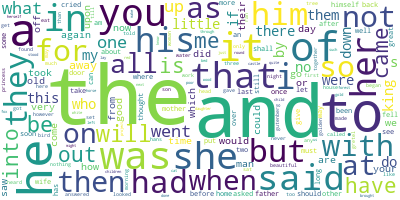

In [41]:
cloud.to_image()

# 뉴스 스크래핑 및 전처리
* HREF를 보면 실제 뉴스에 해당하는 url들이 들어가 있다

In [42]:
import requests

In [43]:
res = requests.get('https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5')

In [44]:
import lxml.html